In [1]:
!pip install lifelines

In [2]:
from lifelines import CoxPHFitter
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess data
cell1 = pd.read_csv('Churn_Data_cleaned.csv')

# Drop columns with more than 50% missing data
cell1 = cell1.loc[:, cell1.isnull().mean() < 0.5]

# Fill missing numeric values with median
numeric_cols = cell1.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    cell1[col].fillna(cell1[col].median(), inplace=True)

# One-hot encode categorical variables
categorical_cols = cell1.select_dtypes(include=['object']).columns
cell1_encoded = pd.get_dummies(cell1, columns=categorical_cols, drop_first=True)

# Identify and remove low variance columns
selector = VarianceThreshold(threshold=0.01)
selector.fit(cell1_encoded)
cell1_filtered = cell1_encoded[cell1_encoded.columns[selector.get_support(indices=True)]]

# Drop highly correlated columns
corr_matrix = cell1_filtered.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
cell1_filtered = cell1_filtered.drop(to_drop, axis=1)

# Fit Cox Proportional Hazards Model with L2 regularization to handle multicollinearity
cph = CoxPHFitter(penalizer=0.1)
cph.fit(cell1_filtered, duration_col='months', event_col='churn')



<ipython-input-2-33b85e5a2345>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cell1[col].fillna(cell1[col].median(), inplace=True)


<lifelines.CoxPHFitter: fitted with 93893 total observations, 47177 right-censored observations>

In [3]:
from lifelines import CoxPHFitter
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
cell1 = pd.read_csv('Churn_Data_cleaned.csv')

# Drop columns with more than 50% missing data
cell1 = cell1.loc[:, cell1.isnull().mean() < 0.5]

# Fill missing numeric values with median — fixed for future compatibility
numeric_cols = cell1.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    cell1[col] = cell1[col].fillna(cell1[col].median())

# Drop problematic date-like columns directly
date_like_cols = [col for col in cell1.columns if 'last_swap' in col]
cell1.drop(columns=date_like_cols, inplace=True, errors='ignore')

# One-hot encode categorical variables
cell1_encoded = pd.get_dummies(cell1, drop_first=True)

# Apply VarianceThreshold on encoded version directly
selector = VarianceThreshold(threshold=0.05)
X_reduced = selector.fit_transform(cell1_encoded)

# Map selected column names
selected_cols = cell1_encoded.columns[selector.get_support(indices=True)]
cell1_reduced = pd.DataFrame(X_reduced, columns=selected_cols)

# Drop highly correlated columns
corr_matrix = cell1_reduced.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_cols = [col for col in upper_tri.columns if any(upper_tri[col] > 0.90)]
cell1_final = cell1_reduced.drop(columns=high_corr_cols)

# Fit Cox Proportional Hazards Model
cph = CoxPHFitter(penalizer=1.0)
cph.fit(cell1_final, duration_col='months', event_col='churn')

import matplotlib.pyplot as plt

# Print summary
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 93893 total observations, 47177 right-censored observations>
             duration col = 'months'
                event col = 'churn'
                penalizer = 1.0
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 93893
number of events observed = 46716
   partial log-likelihood = -477912.83
         time fit was run = 2025-05-24 18:16:17 UTC

---
                                coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                       
rev_Mean                        0.00      1.00      0.00            0.00            0.00                1.00                1.00
mou_Mean                        0.00      1.00      0.00            0.00            0.00                1.00                1.00
totmrc_Mean                     0.00      1.00      0.00            0.00            0.00                1.00                1.00
da_Mean                        -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
ovrmou_Mean                     0.00      1.00      0.00            0.00            0.00                1.00                1.00
datovr_Mean                    -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
roam_Mean                       0.00      1.00      0.00            0.00            0.00                1.00                1.00
change_mou                     -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
change_rev                      0.00      1.00      0.00           -0.00            0.00                1.00                1.00
drop_vce_Mean                   0.00      1.00      0.00            0.00            0.00                1.00                1.00
blck_vce_Mean                   0.00      1.00      0.00            0.00            0.00                1.00                1.00
unan_vce_Mean                   0.00      1.00      0.00            0.00            0.00                1.00                1.00
recv_vce_Mean                  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
comp_vce_Mean                  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
comp_dat_Mean                   0.00      1.00      0.00           -0.00            0.00                1.00                1.00
custcare_Mean                   0.00      1.00      0.00            0.00            0.00                1.00                1.00
ccrndmou_Mean                   0.00      1.00      0.00           -0.00            0.00                1.00                1.00
threeway_Mean                   0.00      1.00      0.00           -0.00            0.01                1.00                1.01
mou_cvce_Mean                  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
mou_cdat_Mean                  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
mou_rvce_Mean                  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
owylis_vce_Mean                -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
mouowylisv_Mean                -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
iwylis_vce_Mean                -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
mouiwylisv_Mean                -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
peak_dat_Mean                   0.04      1.04      0.01            0.02           

<ipython-input-5-9e72acb2d5b7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coef', y=top_features.index, data=top_features, palette='coolwarm')


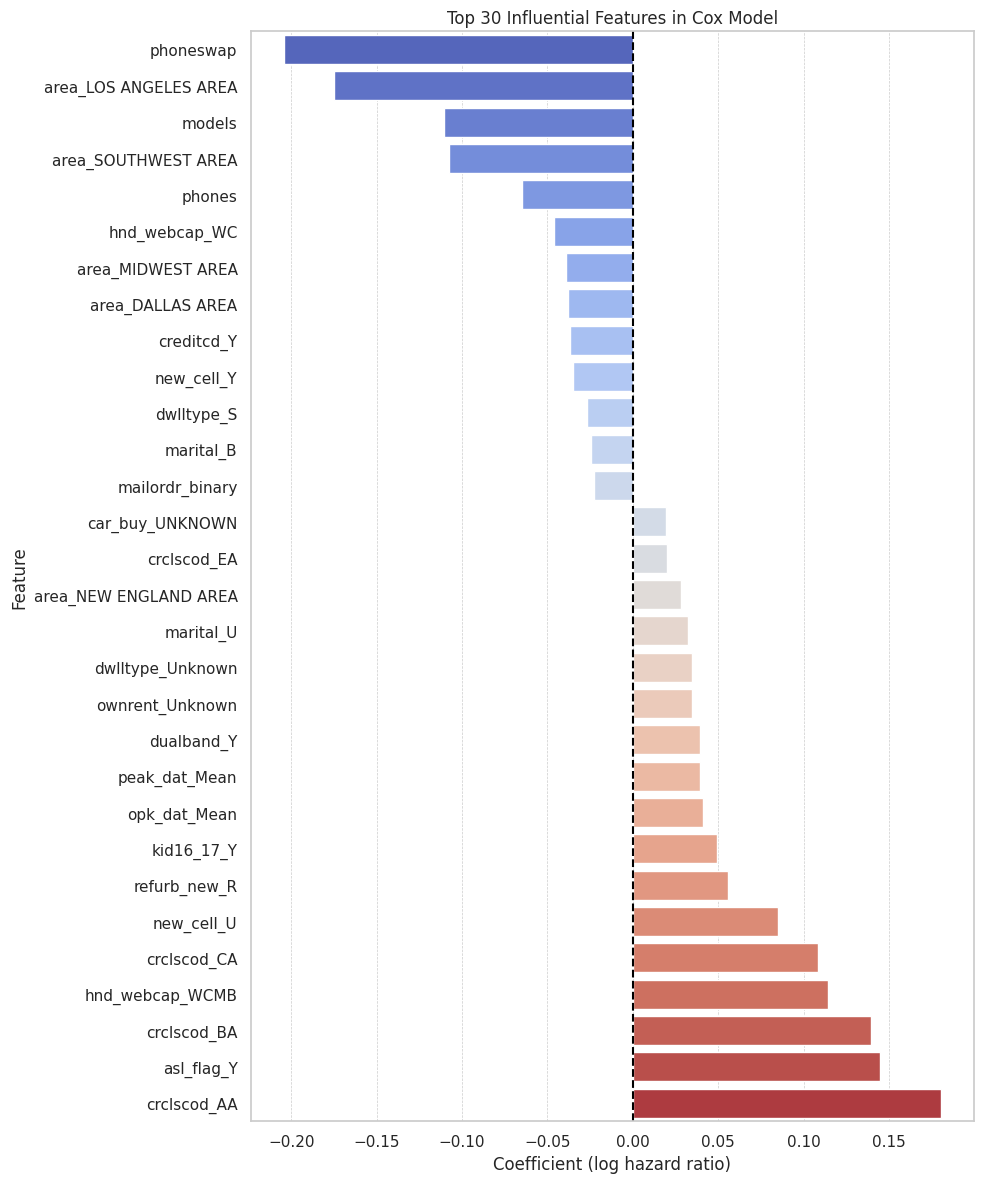

In [5]:
top_features = summary_df.iloc[np.argsort(summary_df['coef'].abs())[-30:]]  # top 30
top_features = top_features.sort_values('coef')

plt.figure(figsize=(10, 12))
sns.barplot(x='coef', y=top_features.index, data=top_features, palette='coolwarm')
plt.axvline(0, color='black', linestyle='--')
plt.title('Top 30 Influential Features in Cox Model')
plt.xlabel('Coefficient (log hazard ratio)')
plt.ylabel('Feature')
plt.grid(True, axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter




# Display initial data
print("Initial Data Preview:")
print(cell1.head())

# Data cleaning
print("\nChecking for missing values:")
missing_values = cell1.isnull().sum()
print(missing_values[missing_values > 0])

# Dropping columns with excessive missing values or irrelevant columns
threshold = 0.5
cell1 = cell1[cell1.columns[cell1.isnull().mean() < threshold]]

# Filling remaining missing values with median for numerical columns
for col in cell1.select_dtypes(include=['float64', 'int64']).columns:
    cell1[col].fillna(cell1[col].median(), inplace=True)

# Convert categorical variables to numerical using one-hot encoding
categorical_columns = cell1.select_dtypes(include=['object']).columns
cell1_encoded = pd.get_dummies(cell1, columns=categorical_columns, drop_first=True)



Initial Data Preview:
   rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
0   23.9975    219.25        22.50   0.2475          0.0          0.0   
1   16.9900     10.25        16.99   0.0000          0.0          0.0   
2   38.0000      7.50        38.00   0.0000          0.0          0.0   
3   55.2300    570.50        71.98   0.0000          0.0          0.0   
4   82.2750   1312.25        75.00   1.2375          0.0          0.0   

   vceovr_Mean  datovr_Mean  roam_Mean  change_mou  ...  Customer_ID   mail  \
0          0.0          0.0        0.0     -157.25  ...      1000001  False   
1          0.0          0.0        0.0       -4.25  ...      1000003  False   
2          0.0          0.0        0.0       -1.50  ...      1000004  False   
3          0.0          0.0        0.0       38.50  ...      1000005  False   
4          0.0          0.0        0.0      156.75  ...      1000006  False   

   phoneswap  retentioncall  acptcall  referrals  pcowner_binary

<ipython-input-7-995a85cfbb92>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cell1[col].fillna(cell1[col].median(), inplace=True)


In [11]:
from lifelines import CoxPHFitter
from sklearn.feature_selection import VarianceThreshold

# STEP 1: Drop near-zero variance columns
vt = VarianceThreshold(threshold=0.01)
X = vt.fit_transform(cell1_encoded)
selected_columns = cell1_encoded.columns[vt.get_support(indices=True)]
cell1_vt = pd.DataFrame(X, columns=selected_columns)

# STEP 2: Drop highly correlated columns
corr_matrix = cell1_vt.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
drop_cols = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
cell1_filtered = cell1_vt.drop(columns=drop_cols)

# STEP 3: CoxPH model with L2 penalization
cph = CoxPHFitter(penalizer=1.0)
cph.fit(cell1_filtered, duration_col='months', event_col='churn')


<lifelines.CoxPHFitter: fitted with 93893 total observations, 47177 right-censored observations>

In [12]:
from lifelines import CoxPHFitter
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Drop categorical features with too many unique values before encoding
drop_high_cardinality = [col for col in cell1.columns if cell1[col].dtype == 'object' and cell1[col].nunique() > 50]
cell1_reduced = cell1.drop(columns=drop_high_cardinality)

# Step 2: Fill missing numerics with median
for col in cell1_reduced.select_dtypes(include=['float64', 'int64']).columns:
    cell1_reduced[col] = cell1_reduced[col].fillna(cell1_reduced[col].median())

# Step 3: One-hot encode categorical variables
categorical_cols = cell1_reduced.select_dtypes(include='object').columns
cell1_encoded = pd.get_dummies(cell1_reduced, columns=categorical_cols, drop_first=True)

# Step 4: Drop near-zero variance columns
vt = VarianceThreshold(threshold=0.01)
X = vt.fit_transform(cell1_encoded)
selected_cols = cell1_encoded.columns[vt.get_support()]
cell1_vt = pd.DataFrame(X, columns=selected_cols)

# Step 5: Drop highly correlated features
corr_matrix = cell1_vt.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
drop_cols = [col for col in upper_tri.columns if any(upper_tri[col] > 0.95)]
cell1_final = cell1_vt.drop(columns=drop_cols)




In [13]:
# Install necessary packages
!pip install statsmodels lifelines scikit-learn

In [14]:
!pip install -U statsmodels


In [15]:
import statsmodels.api as sm



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:24:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


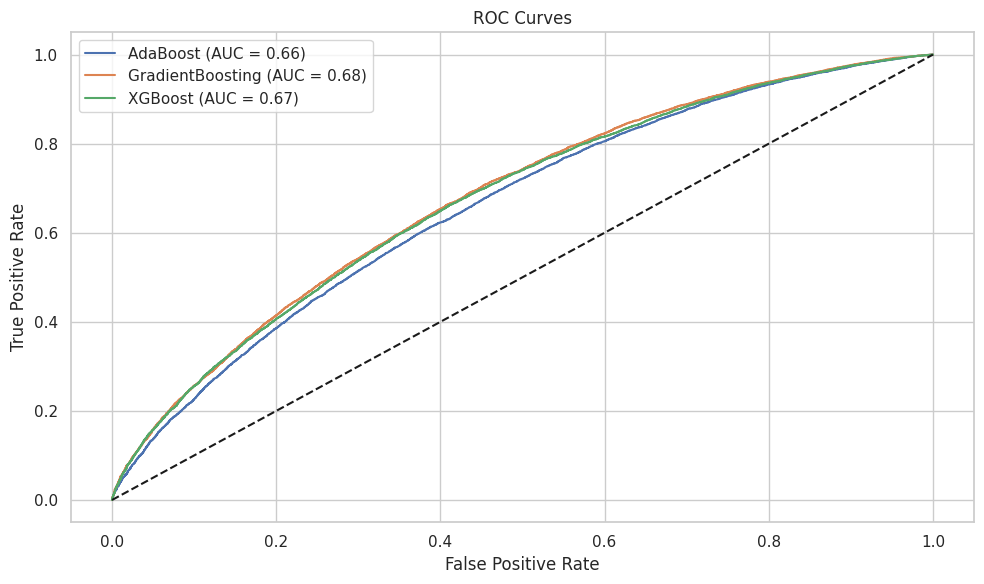

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt



# Drop columns with >50% missing data
cell1 = cell1.loc[:, cell1.isnull().mean() < 0.5]

# Drop high-cardinality categorical columns (>50 unique values)
high_card_cols = [col for col in cell1.columns if cell1[col].dtype == 'object' and cell1[col].nunique() > 50]
cell1.drop(columns=high_card_cols, inplace=True)

# Fill missing numeric values with median
for col in cell1.select_dtypes(include=['float64', 'int64']).columns:
    cell1[col] = cell1[col].fillna(cell1[col].median())

# One-hot encode remaining categorical columns
cell1 = pd.get_dummies(cell1, drop_first=True)

# Ensure target exists
if 'churn' not in cell1.columns:
    raise ValueError("Target variable 'churn' not found in dataset.")

# Feature/target split
X = cell1.drop(columns=['churn'])
y = cell1['churn']

# Feature reduction by removing low variance columns
X = VarianceThreshold(threshold=0.01).fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Evaluate and store results
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {"model": model, "auc": auc, "report": report}

# Plot ROC curves
plt.figure(figsize=(10, 6))
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result["model"].predict_proba(X_test_scaled)[:, 1])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {result["auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


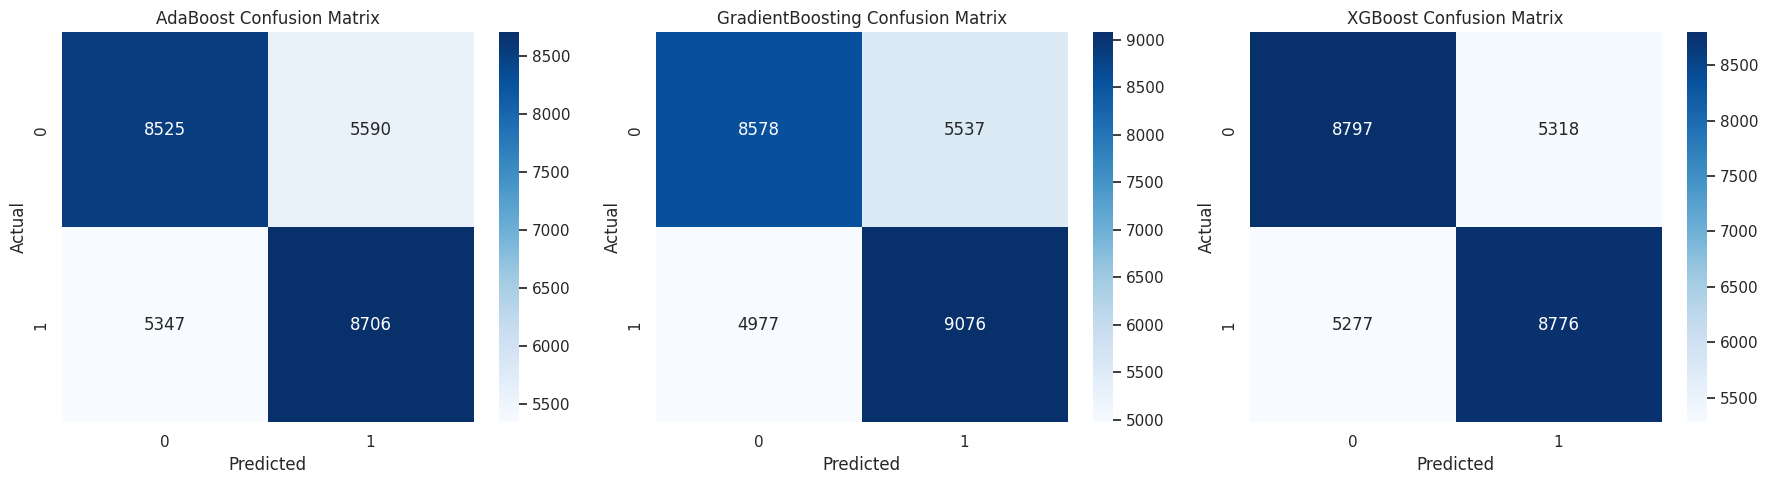

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute and plot confusion matrices for each model
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, result) in zip(axes, results.items()):
    y_pred = result["model"].predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"{name} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5242 - loss: 0.7047 - val_accuracy: 0.5805 - val_loss: 0.6773
Epoch 2/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5705 - loss: 0.6790 - val_accuracy: 0.5921 - val_loss: 0.6706
Epoch 3/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5911 - loss: 0.6707 - val_accuracy: 0.5977 - val_loss: 0.6647
Epoch 4/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5977 - loss: 0.6671 - val_accuracy: 0.5989 - val_loss: 0.6653
Epoch 5/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6012 - loss: 0.6637 - val_accuracy: 0.6082 - val_loss: 0.6618
Epoch 6/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6087 - loss: 0.6605 - val_accuracy: 0.6074 - val_loss: 0.6629
Epoch 7/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6085 - loss: 0.6571 - val_accuracy: 0.6107 - val_loss: 0.6603
Epoch 8/50
411/411 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6074 - loss: 0.6569 - val_accuracy: 0.

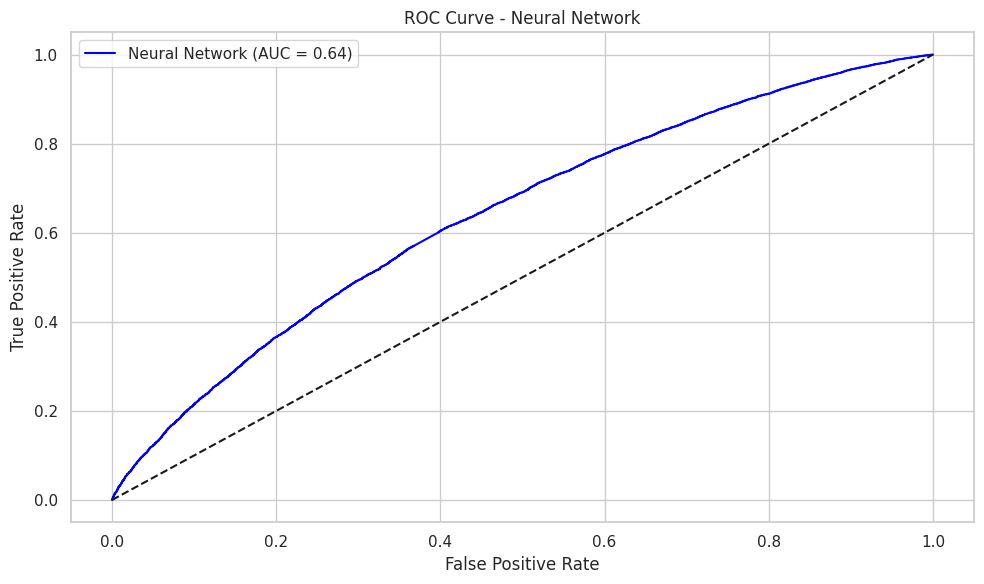

In [18]:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Data preparation
cell1 = cell1.loc[:, cell1.isnull().mean() < 0.5]
high_card_cols = [col for col in cell1.columns if cell1[col].dtype == 'object' and cell1[col].nunique() > 50]
cell1.drop(columns=high_card_cols, inplace=True)

for col in cell1.select_dtypes(include=['float64', 'int64']).columns:
    cell1[col] = cell1[col].fillna(cell1[col].median())

cell1 = pd.get_dummies(cell1, drop_first=True)

if 'churn' not in cell1.columns:
    raise ValueError("Target variable 'churn' not found in dataset.")

X = cell1.drop(columns=['churn'])
y = cell1['churn']

X = VarianceThreshold(threshold=0.01).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural Network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=128, validation_split=0.2, verbose=1)

# Evaluate
nn_pred_prob = model.predict(X_test_scaled).flatten()
nn_pred = (nn_pred_prob > 0.5).astype(int)
nn_auc = roc_auc_score(y_test, nn_pred_prob)
print(f"Neural Network AUC: {nn_auc:.2f}")
print(classification_report(y_test, nn_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, nn_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Neural Network (AUC = {nn_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Neural Network')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


822/822 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5141 - loss: 0.7779 - val_accuracy: 0.5666 - val_loss: 0.6794
Epoch 2/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5422 - loss: 0.6972 - val_accuracy: 0.5859 - val_loss: 0.6711
Epoch 3/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5624 - loss: 0.6818 - val_accuracy: 0.5903 - val_loss: 0.6669
Epoch 4/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5831 - loss: 0.6733 - val_accuracy: 0.6006 - val_loss: 0.6644
Epoch 5/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5892 - loss: 0.6680 - val_accuracy: 0.6045 - val_loss: 0.6632
Epoch 6/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5989 - loss: 0.6631 - val_accuracy: 0.6081 - val_loss: 0.6605
Epoch 7/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6028 - loss: 0.6622 - val_accuracy: 0.6094 - val_loss: 0.6605
Epoch 8/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6107 - loss: 0.6571 - val_accuracy: 0.60

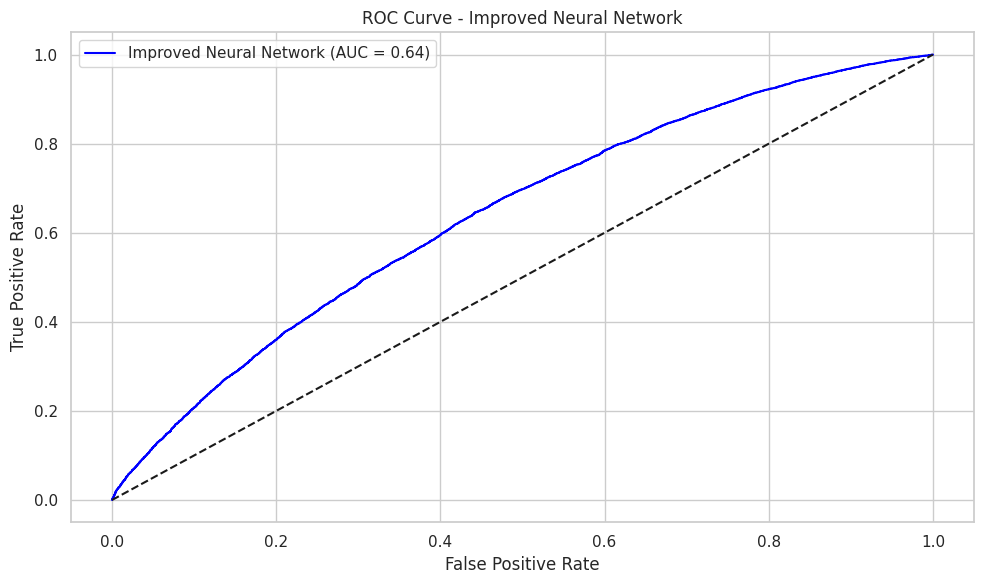

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Data preparation
cell1 = cell1.loc[:, cell1.isnull().mean() < 0.5]
high_card_cols = [col for col in cell1.columns if cell1[col].dtype == 'object' and cell1[col].nunique() > 50]
cell1.drop(columns=high_card_cols, inplace=True)

for col in cell1.select_dtypes(include=['float64', 'int64']).columns:
    cell1[col] = cell1[col].fillna(cell1[col].median())

cell1 = pd.get_dummies(cell1, drop_first=True)

if 'churn' not in cell1.columns:
    raise ValueError("Target variable 'churn' not found in dataset.")

X = cell1.drop(columns=['churn'])
y = cell1['churn']

X = VarianceThreshold(threshold=0.01).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Improved Neural Network model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate
nn_pred_prob = model.predict(X_test_scaled).flatten()
nn_pred = (nn_pred_prob > 0.5).astype(int)
nn_auc = roc_auc_score(y_test, nn_pred_prob)
print(f"Neural Network AUC: {nn_auc:.2f}")
print(classification_report(y_test, nn_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, nn_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Improved Neural Network (AUC = {nn_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Improved Neural Network')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
